Panda gaming data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

data setup:

In [2]:
%matplotlib inline

In [3]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

CSV file of the gaming data

In [4]:
gaming_data = pd.read_csv("clubs-gaming-machine-report-by-lga.csv")
print("done")

done


In [5]:
gaming_data.head()

,LGA,Profit,Tax,Machines,Premises Count
0,Albury\nGreater Hume,"24,405,524","5,266,934",850,8.0
1,Armidale\nGlen Innes Severn,"5,778,231","788,695",267,7.0
2,Ballina,"8,496,734","1,451,539",383,7.0
3,Balranald\nCarrathool\nCentral Darling,"4,840,075","744,971",202,6.0
4,Bathurst\r\nBlayney,"5,356,026","894,190",275,7.0


Columns of the gaming data

In [6]:
gaming_data.columns

Index(['LGA', ' Profit ', ' Tax ', ' Machines', ' Premises Count '], dtype='object')

row of the gaming data

In [7]:
row_one = gaming_data.iloc[1]
row_one

LGA                 Armidale\nGlen Innes Severn
 Profit                               5,778,231
 Tax                                    788,695
 Machines                                   267
 Premises Count                             7.0
Name: 1, dtype: object

In [8]:
row_one[" Tax "]


'788,695'

In [9]:
row_two = gaming_data.iloc[9]
row_two

LGA                  Blacktown
 Profit             37,381,922
 Tax                 7,812,098
 Machines                2,079
 Premises Count           11.0
Name: 9, dtype: object

In [10]:
row_two[" Tax "]

'7,812,098'

In [11]:
gaming_data.head(3)

,LGA,Profit,Tax,Machines,Premises Count
0,Albury\nGreater Hume,"24,405,524","5,266,934",850,8.0
1,Armidale\nGlen Innes Severn,"5,778,231","788,695",267,7.0
2,Ballina,"8,496,734","1,451,539",383,7.0


In [12]:
gaming_data.describe()

,Premises Count
count,95.000000
mean,10.863158
std,6.967417
min,5.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,36.000000


In [13]:
print(gaming_data.LGA)

0                       Albury\nGreater Hume
1                Armidale\nGlen Innes Severn
2                                    Ballina
3     Balranald\nCarrathool\nCentral Darling
4                        Bathurst\r\nBlayney
                       ...                  
91                                  Waverley
92                             Wingecarribee
93                               Wollondilly
94                                Wollongong
95                                       NaN
Name: LGA, Length: 96, dtype: object


<AxesSubplot:>

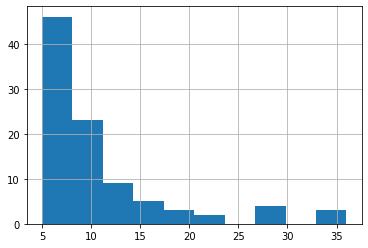

In [14]:
gaming_data[" Premises Count "].hist()

In [15]:
gaming_data[' Machines']

0       850
1       267
2       383
3       202
4       275
      ...  
91      369
92      313
93      167
94    2,156
95      NaN
Name:  Machines, Length: 96, dtype: object

In [16]:
gaming_data[' Machines'].value_counts()

279      2
237      2
850      1
1,224    1
300      1
        ..
139      1
177      1
93       1
80       1
2,156    1
Name:  Machines, Length: 93, dtype: int64

In [17]:
gaming_data[" Premises Count "]

0      8.0
1      7.0
2      7.0
3      6.0
4      7.0
      ... 
91     6.0
92     7.0
93     5.0
94    35.0
95     NaN
Name:  Premises Count , Length: 96, dtype: float64

In [21]:
gaming_data.sort_values(" Tax ")

,LGA,Profit,Tax,Machines,Premises Count
51,Kyogle,"114,952",-,42,5.0
90,Warrumbungle,"664,337",-,96,10.0
42,Gwydir\r\nUralla\r\nWalcha,"952,863",-,95,10.0
16,Cabonne,"871,085",-,92,11.0
39,Goulburn Mulwaree\r\nUpper Lachlan,"6,884,021","1,058,053",385,7.0
...,...,...,...,...,...
91,Waverley,"4,885,521","912,744",369,6.0
22,Cessnock,"7,508,814","916,725",533,12.0
6,Bega Valley,"7,721,981","920,028",488,11.0
85,Sydney,"6,214,839","939,325",558,8.0


In [70]:
gaming_data.sort_values([" Tax ","LGA"],ascending=True)

,LGA,Profit,Tax,Machines,Premises Count
16,Cabonne,"871,085",-,92,11.0
42,Gwydir\r\nUralla\r\nWalcha,"952,863",-,95,10.0
51,Kyogle,"114,952",-,42,5.0
90,Warrumbungle,"664,337",-,96,10.0
39,Goulburn Mulwaree\r\nUpper Lachlan,"6,884,021","1,058,053",385,7.0
...,...,...,...,...,...
91,Waverley,"4,885,521","912,744",369,6.0
22,Cessnock,"7,508,814","916,725",533,12.0
6,Bega Valley,"7,721,981","920,028",488,11.0
85,Sydney,"6,214,839","939,325",558,8.0


In [74]:
gaming_data.groupby([" Machines"]).mean()

,Premises Count
Machines,
"1,058",18.0
"1,067",8.0
"1,076",28.0
"1,224",11.0
"1,387",23.0
...,...
93,5.0
95,10.0
956,14.0
